# 과일 Data를 CNN으로 Image 분류

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 과일 Data 불러오기

import numpy as np

fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

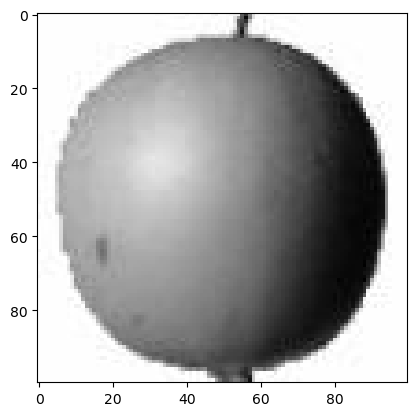

In [3]:
# image로 확인하기

import matplotlib.pyplot as plt

plt.imshow(fruits[0].reshape(100, 100), cmap='gray_r') # gray_r
plt.show()

In [4]:
# Target 만들기

target =  np.concatenate([np.zeros(100), np.ones(100), np.full(100, 2)])
target.shape

(300,)

In [5]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

---
### train과 test로 분류하기

In [6]:
train = fruits.reshape(-1, 100, 100, 1) / 255.0 # Pixel Size : 100, 100

In [7]:
from sklearn.model_selection import train_test_split

trainData, valData, trainTargetData, valTargetData = train_test_split(
    train, target, test_size=0.2, random_state=42)

In [8]:
# 크기 확인하기

print(trainData.shape)
print(valData.shape)
print(trainTargetData.shape)
print(valTargetData.shape)

(240, 100, 100, 1)
(60, 100, 100, 1)
(240,)
(60,)


---
# CNN 만들기

In [9]:
from tensorflow import keras

model = keras.Sequential()

2024-06-25 10:55:40.894060: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', 
                              input_shape=(100,100,1)))

# kernel size의 채널은 입력데이터 채널에 크기에 따라간다.

In [11]:
model.add(keras.layers.MaxPooling2D(2))

# 풀링은 채널별로 구성되기 때문에 Depth차원은 그대로 유지된다.

In [12]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [13]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation='softmax'))

# 첫번째 Dense층에 3136개(64 * 7 * 7)의 가중치가 있으므로 과대적합이 발생할 것 같아 Dropout을 실행

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,019,219 (15.33 MB)

 Trainable params: 4,019,219 (15.33 MB)

 Non-trainable params: 0 (0.00 B)

---
### Model Compile과 훈련

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/cnn/best-cnn-model01.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(trainData, trainTargetData, epochs=20,
                    validation_data=(valData, valTargetData),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 596ms/step - accuracy: 0.5302 - loss: 0.9328 - val_accuracy: 0.9833 - val_loss: 0.1544
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step - accuracy: 0.9886 - loss: 0.1154 - val_accuracy: 1.0000 - val_loss: 0.0137
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step - accuracy: 0.9953 - loss: 0.0239 - val_accuracy: 1.0000 - val_loss: 3.6553e-04
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 2.8976e-04
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 460ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 4.9424e-05
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 447ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 3.3119e-05
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - accuracy: 1.0000 - loss: 5.7988e-04 - val_accuracy: 1.0000 - val_loss: 1.2297e-04
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 410ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accu

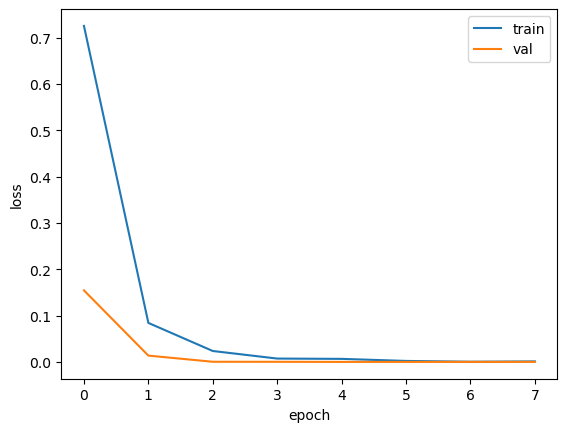

In [17]:
# 시각화 해보기


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 평가화 예측

In [18]:
# 검증 데이터 

model.evaluate(valData, valTargetData)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 2.9983e-05


[3.311865293653682e-05, 1.0]

---
### 이미지 확인해 보기

In [19]:
fruitsName = ['apple', 'pineapple', 'banana']

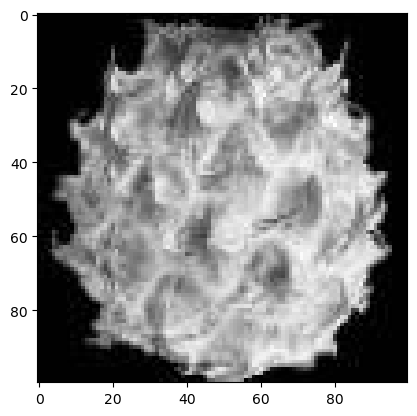

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[[6.2666493e-07 9.9999738e-01 1.9825982e-06]]
pineapple


In [20]:
# 이미지 확인해보기

plt.imshow(valData[19].reshape(100, 100), cmap='gray')
plt.show()

preds = model.predict(valData[19:20])
print(preds)
print(fruitsName[list(preds[0]).index(max(preds[0]))])

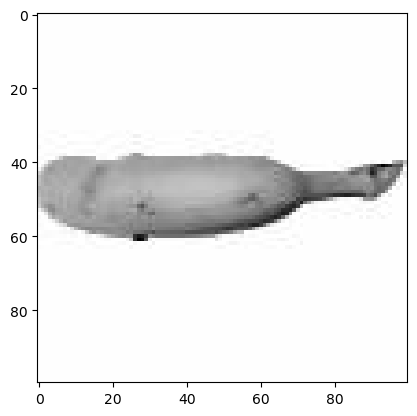

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[5.4404492e-10 2.5766965e-08 1.0000000e+00]]
banana


In [21]:
# 이미지 확인해보기

plt.imshow(valData[0].reshape(100, 100), cmap='gray_r')
plt.show()

preds = model.predict(valData[0:1])
print(preds)
print(fruitsName[list(preds[0]).index(max(preds[0]))])

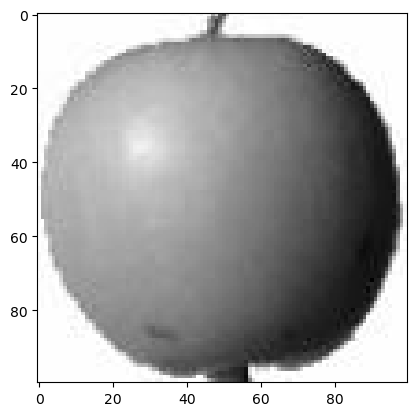

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[9.9999714e-01 2.8848883e-06 8.8711145e-09]]
apple


In [22]:
# 이미지 확인해보기

plt.imshow(valData[20].reshape(100, 100), cmap='gray_r')
plt.show()

preds = model.predict(valData[20:21])
print(preds)
print(fruitsName[list(preds[0]).index(max(preds[0]))])

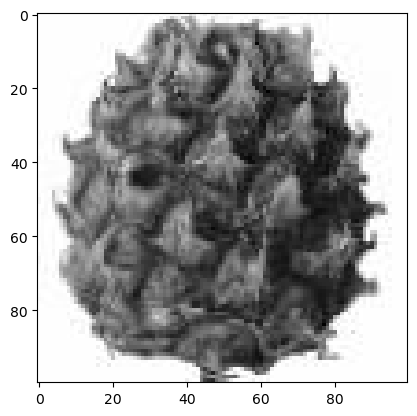

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[2.1225199e-07 9.9999738e-01 2.4088270e-06]]
pineapple


In [23]:
# 이미지 확인해보기

plt.imshow(valData[50].reshape(100, 100), cmap='gray_r')
plt.show()

preds = model.predict(valData[50:51])
print(preds)
print(fruitsName[list(preds[0]).index(max(preds[0]))])

In [24]:
# 가중치 확인하기

print(model.weights)

[<KerasVariable shape=(3, 3, 1, 32), dtype=float32, path=sequential/conv2d/kernel>, <KerasVariable shape=(32,), dtype=float32, path=sequential/conv2d/bias>, <KerasVariable shape=(3, 3, 32, 64), dtype=float32, path=sequential/conv2d_1/kernel>, <KerasVariable shape=(64,), dtype=float32, path=sequential/conv2d_1/bias>, <KerasVariable shape=(40000, 100), dtype=float32, path=sequential/dense/kernel>, <KerasVariable shape=(100,), dtype=float32, path=sequential/dense/bias>, <KerasVariable shape=(100, 3), dtype=float32, path=sequential/dense_1/kernel>, <KerasVariable shape=(3,), dtype=float32, path=sequential/dense_1/bias>]
